In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

C:\Users\Pavithira\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8860 - loss: 0.3658
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9740 - loss: 0.0861
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9831 - loss: 0.0549
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9855 - loss: 0.0434
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9898 - loss: 0.0314


In [19]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9815 - loss: 0.0623


[0.04867665842175484, 0.9855999946594238]

In [23]:
y_predict = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [29]:
y_predicts=np.argmax(y_predict, axis=1)

In [37]:
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [49]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [53]:
confusion_mtx=confusion_matrix(y_test,y_predicts)
confusion_mtx

array([[ 975,    1,    0,    0,    1,    0,    1,    1,    1,    0],
       [   0, 1131,    1,    0,    0,    1,    1,    0,    1,    0],
       [   0,    3, 1015,    0,    4,    0,    2,    6,    2,    0],
       [   0,    0,    1,  995,    0,    4,    0,    4,    5,    1],
       [   0,    0,    0,    0,  972,    0,    6,    0,    0,    4],
       [   2,    0,    1,    7,    0,  880,    2,    0,    0,    0],
       [   7,    3,    1,    0,    7,    4,  934,    0,    2,    0],
       [   0,    4,    8,    1,    0,    0,    0, 1012,    1,    2],
       [   3,    0,    2,    0,    0,    6,    0,    2,  959,    2],
       [   1,    3,    0,    5,   10,    1,    0,    4,    2,  983]],
      dtype=int64)

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


 1 




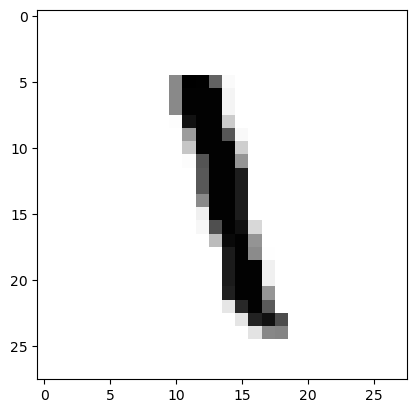

In [83]:
import matplotlib.pyplot as plt
image_index = 700
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("\n\n", pred.argmax(), "\n\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


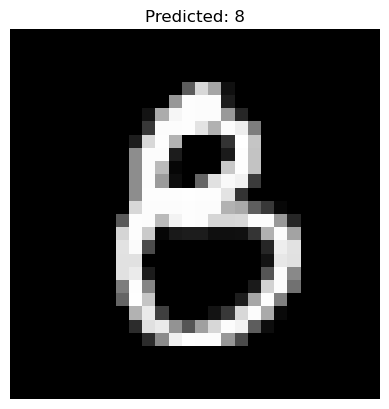

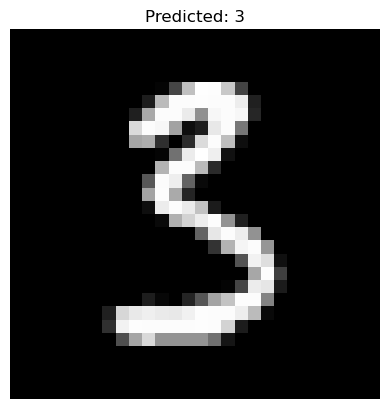

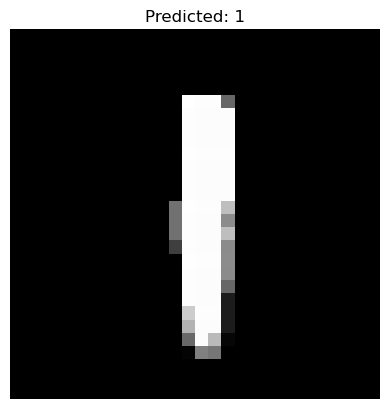

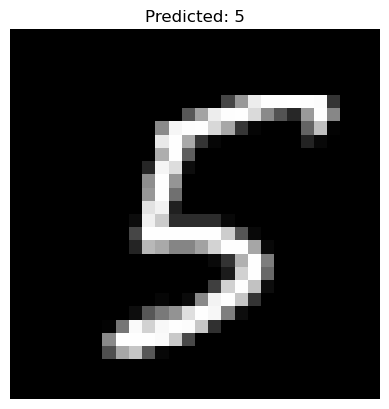

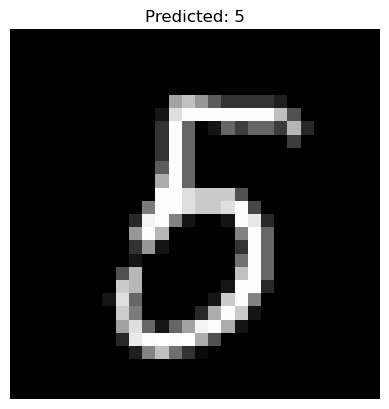

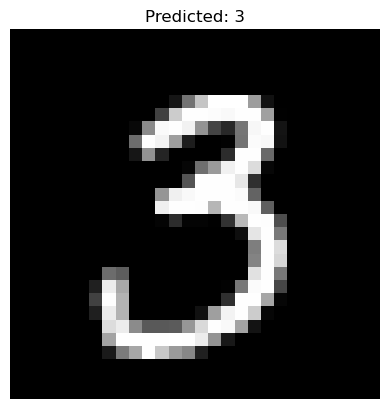

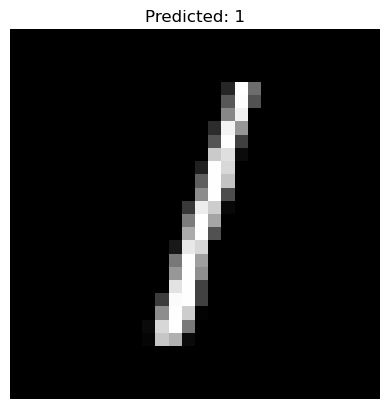

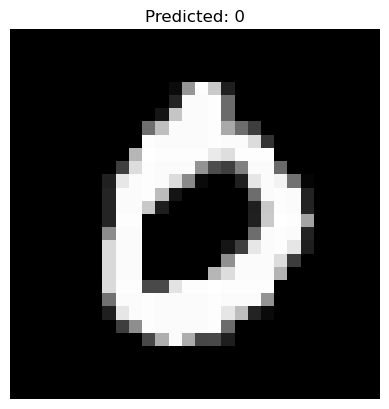

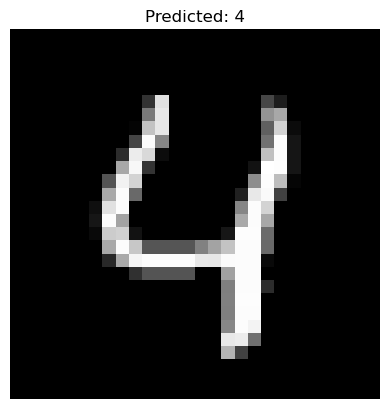

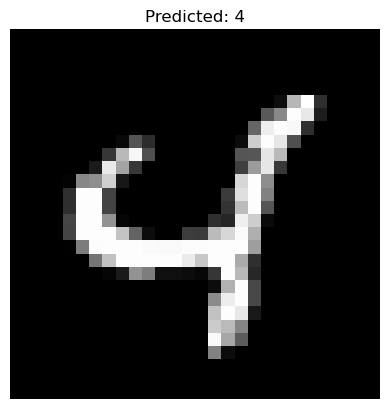

In [85]:
# Multiple indices
image_indices = [800, 890, 345, 23, 45, 90, 2, 3, 4, 67]

# Get subset of images
x_subset = x_test[image_indices]

# Reshape for model input (assuming grayscale 28x28 images)
x_subset_reshaped = x_subset.reshape(len(image_indices), 28, 28, 1)

# Predict all
predictions = model.predict(x_subset_reshaped)

# Use argmax if it's classification
predicted_classes = predictions.argmax(axis=1)

# Display predictions
for i, img_idx in enumerate(image_indices):
    plt.figure()
    plt.imshow(x_test[img_idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.axis('off')
    plt.show()
